# Project Organization

In this notebook, we will just put in practice some of the concepts we went through so far, to create an automated analysis of a growing set of data files.

For this we are going to use a dataset that simulates a series of [ELISA](https://en.wikipedia.org/wiki/ELISA) experiments.

Your datafiles are organized in a series of folders with date as the name (YYYYMM), and a series of datafiles inside each of them, all named `elisa_YYYYMMDD.xlsx`.

<div class="alert alert-info">

We want to write a script that reads all datafiles, in all folders, such that we can run the *same* script on your data regardless of the number of folders or datafiles.

**By the way**, this is a good structure to use for your projects. 

</div>




<div class="alert alert-info">

### This is a Jupyter notebook

You can learn all about the Jupyter interface [here](https://realpython.com/jupyter-notebook-introduction/)

Some basics: 
Jupyter has two modes: command and edit. When you click a cell, you enter ```edit mode``` and you can edit its contents. To exit ```edit mode```, you press ```ESC```.

* Cells can be either code cells or text (or markdown) cells
* To run cells, press Shift+enter 
* To turn a cell into a text cell, press `m` (markdown) in command mode
* To create a new cell use `b` (new cell below) or `a` (above) in command mode

</div>

Let's look at our folders:

In [3]:
setwd('../datasets/ELISAdata/')
dir()

[1] "201903" "201904" "201905" "201906"

So, there are 4 folders.
Let's list the contents of one of them.

In [4]:
dir("201904")

[1] "elisa_20190402.xlsx" "elisa_20190411.xlsx" "elisa_20190427.xlsx"

We need to import the `openxlsx` package, since our datafiles are excel files.

In [1]:
require(openxlsx)

Loading required package: openxlsx


let's load one of the datafiles to see its contents

In [7]:
data = read.xlsx('201903/elisa_20190316.xlsx',1)
head(data)

Dilution,Signal
<dbl>,<dbl>
1.0000000000,10.052429
0.1666666667,10.080984
0.0277777778,9.992279
0.0046296296,9.658551
0.0007716049,7.884615
0.0001286008,3.739220


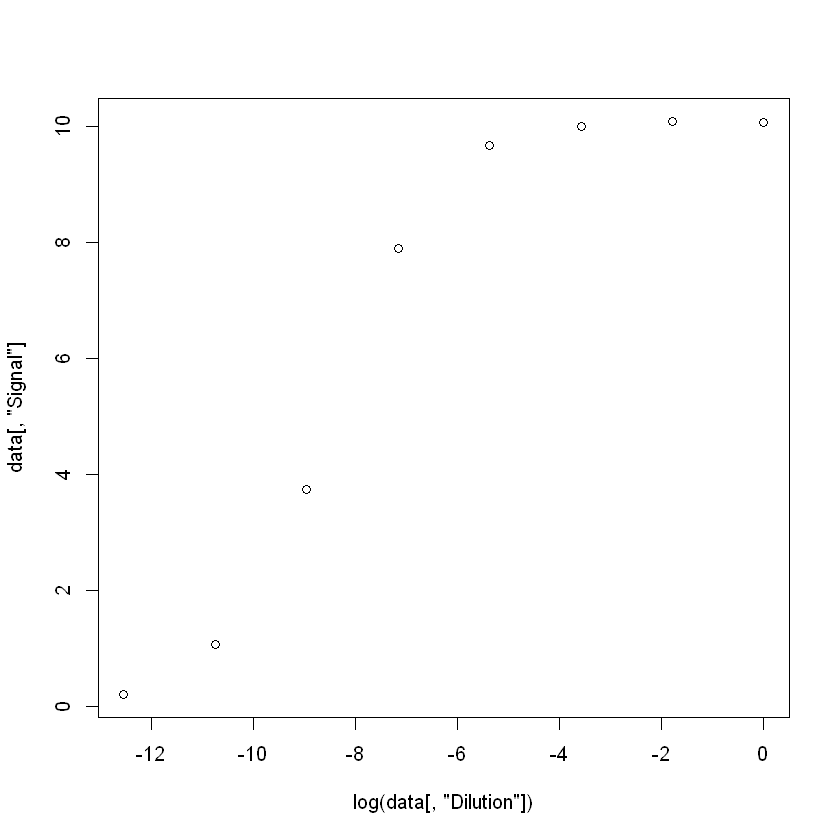

In [8]:
plot(log(data[,"Dilution"]),data[,"Signal"])

Notice that we plotted the $\log$ of the Dilution on the `xx` axis

So, the idea is to iterate through all the folder, loading all the datafiles into one data frame. 

* Get a list of every data folder
* For every folder, list the data files inside
* Load every datafile and append it to a master list

This will return a dataframe with the dilution and signal values of every datafile. We will probably also need to differentiate between the several datafiles, so we will add to a column with the filename.

In [9]:
# this will be a vector to store all the dataframes (data files)
dfs = vector()

# this are all the folders with data inside
folders = dir()

for (folder in folders){
    print(folder)
    files = dir(folder)
    for (file in files){
        df = read.xlsx(paste(folder,file,sep='/'),1)
        df[,"date"]=substr(file,7,14)
        dfs = rbind(dfs,df)
    }
}

[1] "201903"
[1] "201904"
[1] "201905"
[1] "201906"


In [10]:
dfs

Dilution,Signal,date
<dbl>,<dbl>,<chr>
1.000000e+00,10.0538238,20190308
1.666667e-01,9.9865811,20190308
2.777778e-02,9.6186379,20190308
4.629630e-03,7.7088806,20190308
7.716049e-04,3.5735819,20190308
1.286008e-04,1.0060596,20190308
2.143347e-05,0.2425829,20190308
3.572245e-06,0.1162421,20190308
1.000000e+00,10.0524289,20190316


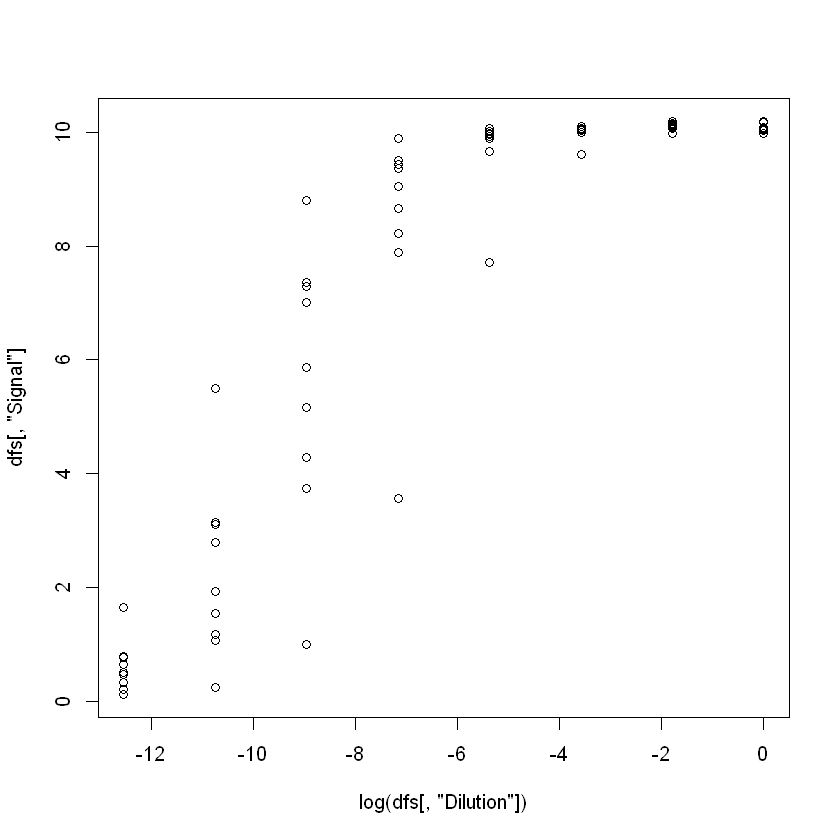

In [11]:
plot(log(dfs[,"Dilution"]),dfs[,"Signal"])

## bonus: Fitting a function to the data

The data seems to be sigmoidal in shape. So, let's try to fit a Michalis-Menten curve to it:

$$
S = k_2\frac{C}{k_1 + C}
$$

where $D$ is the dilution.

In order to perform the fitting, we will use the function `nls()`. We will fit 2 parameters $k_1$ and $k_2$.

`nls()` takes 3 arguments:

* the model
* starting values for the parameters
* and the data

The model is specified using the column names like this:

```
Signal ~ k2*Dilution/(k1+Dilution)
```

The data is passed as the dataframe we just constructed.

In [13]:
mod <- nls(Signal ~ k2*Dilution/(k1+Dilution),start=list(k1=.5,k2=10),data = dfs)

The variable `mod` now contains the result of the fitting. 

In [15]:
mod

Nonlinear regression model
  model: Signal ~ k2 * Dilution/(k1 + Dilution)
   data: dfs
       k1        k2 
8.841e-05 9.937e+00 
 residual sum-of-squares: 108

Number of iterations to convergence: 13 
Achieved convergence tolerance: 3.006e-06

And now we can plot the fitting. Notice that 

1. we needed to construct a set of `xx` values that are equidistance in in log scale, and then exponentiate those because we will plot them in log-scale
2. We had to add these `xx` values to a dataframe, in a column called `Dilution`.
3. In order to get the results of the fitting, we `predict()` those values.


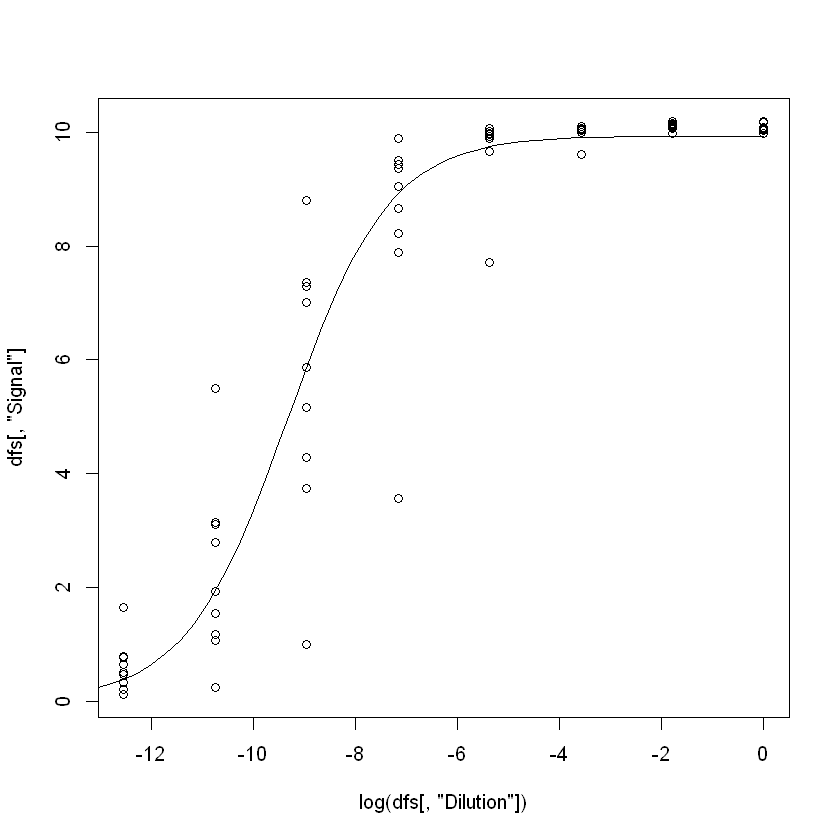

In [20]:
xx = exp(seq(log(1e-12), log(1), length.out = 100))
myx = data.frame(Dilution = c(xx))

preds = predict(mod,myx)

plot(log(dfs[,"Dilution"]),dfs[,"Signal"])
lines(log(xx),preds)

<div class="alert alert-info">

Later, we will have a tutorial about how to fit functions and the theory behind it.

</div>